In [206]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics
import math

## Уровень доверия

In [207]:
def get_normal_samples(n):
    k = 50
    norm_rv = sps.norm(loc=10, scale=2)
    samples = []
    for i in range(k):
        samples.append(norm_rv.rvs(size=n))
    
    return np.array(samples)

In [208]:
def get_means(samples):
    means = []
    for i in range(len(samples)):
        means.append(samples[i].mean())
    
    return np.array(means)

In [209]:
def get_borders(means, p):
    norm_rv = sps.norm(0, 1)
    fp = norm_rv.ppf((1+p)/2)
    left, right = [], []
    for i in range(len(means)):
        left.append(means[i] - fp*(2/np.sqrt(10)))
        right.append(means[i] + fp*(2/np.sqrt(10)))

    return np.array(left), np.array(right)

In [210]:
def print_quantile(func, ps):
    quantiles = list(map(lambda x: np.round(x, 3), func.ppf((1+ps)/2)))
    df = pd.DataFrame()
    df['Pд'] = ps
    df['Значение квантили fp'] = quantiles
    return df

In [211]:
probs = np.array([0.9, 0.99, 0.999])
print_quantile(sps.norm(0, 1), probs)

,Pд,Значение квантили fp
0,0.900,1.645
1,0.990,2.576
2,0.999,3.291


In [212]:
samples = get_normal_samples(10)
means = get_means(samples)
df = pd.DataFrame(samples)
df['mean'] = means

left, right = get_borders(means, 0.9)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,10.181442,10.855668,5.992554,8.366808,11.564265,10.101481,10.608640,12.250227,10.739947,7.388692,9.804972,8.764676,10.845269
1,7.600793,14.262939,9.120166,10.945636,9.791147,10.298920,7.859350,8.905705,12.390102,7.885520,9.906028,8.865731,10.946325
2,8.381201,12.090033,13.489714,6.634496,8.798161,9.373637,6.721294,9.625364,8.805649,7.542185,9.146173,8.105877,10.186470
3,12.300353,10.365359,9.189422,10.370351,11.782454,10.758986,10.569155,12.989164,12.120233,13.700447,11.414592,10.374296,12.454889
4,10.201613,10.179267,11.339972,7.777840,10.980859,11.208723,12.615151,8.997038,11.692123,12.341511,10.733410,9.693113,11.773706


In [213]:
def draw_borders(left, right):
    x = np.linspace(1, 50, 50)
    plt.axis([0, 51, 5, 15])
    plt.plot(x, left, label='a1')
    plt.plot(x, right, label='a2')
    plt.scatter(x, left, s=10)
    plt.scatter(x, right, s=10)
    plt.xlabel('Номер испытания')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.legend()

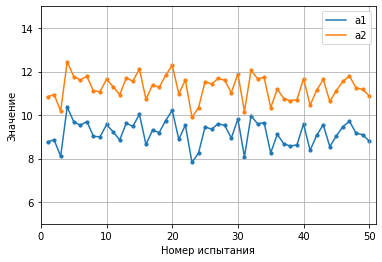

In [214]:
draw_borders(left, right)

In [215]:
left, right = get_borders(means, 0.99)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,10.181442,10.855668,5.992554,8.366808,11.564265,10.101481,10.608640,12.250227,10.739947,7.388692,9.804972,8.175875,11.434070
1,7.600793,14.262939,9.120166,10.945636,9.791147,10.298920,7.859350,8.905705,12.390102,7.885520,9.906028,8.276930,11.535125
2,8.381201,12.090033,13.489714,6.634496,8.798161,9.373637,6.721294,9.625364,8.805649,7.542185,9.146173,7.517076,10.775271
3,12.300353,10.365359,9.189422,10.370351,11.782454,10.758986,10.569155,12.989164,12.120233,13.700447,11.414592,9.785495,13.043690
4,10.201613,10.179267,11.339972,7.777840,10.980859,11.208723,12.615151,8.997038,11.692123,12.341511,10.733410,9.104312,12.362507


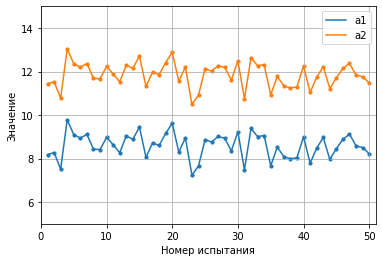

In [216]:
draw_borders(left, right)

In [217]:
left, right = get_borders(means, 0.999)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,10.181442,10.855668,5.992554,8.366808,11.564265,10.101481,10.608640,12.250227,10.739947,7.388692,9.804972,7.723861,11.886084
1,7.600793,14.262939,9.120166,10.945636,9.791147,10.298920,7.859350,8.905705,12.390102,7.885520,9.906028,7.824916,11.987140
2,8.381201,12.090033,13.489714,6.634496,8.798161,9.373637,6.721294,9.625364,8.805649,7.542185,9.146173,7.065062,11.227285
3,12.300353,10.365359,9.189422,10.370351,11.782454,10.758986,10.569155,12.989164,12.120233,13.700447,11.414592,9.333481,13.495704
4,10.201613,10.179267,11.339972,7.777840,10.980859,11.208723,12.615151,8.997038,11.692123,12.341511,10.733410,8.652298,12.814521


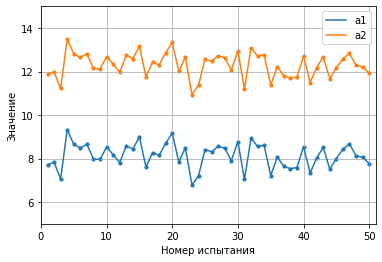

In [218]:
draw_borders(left, right)

### Для случая с неизвестной дисперсией

In [219]:
print_quantile(sps.t(df=9), probs)

,Pд,Значение квантили fp
0,0.900,1.833
1,0.990,3.250
2,0.999,4.781


In [220]:
def get_borders_unknown_disp(means, std, p):
    stud_rv = sps.t(df=9)
    tp = stud_rv.ppf((1+p)/2)
    left, right = [], []
    for i in range(len(means)):
        left.append(means[i] - tp*(std[i]/np.sqrt(10)))
        right.append(means[i] + tp*(std[i]/np.sqrt(10)))

    return np.array(left), np.array(right)

In [221]:
samples = get_normal_samples(10)
means = get_means(samples)
std = list(map(lambda x : statistics.stdev(x), samples))
df = pd.DataFrame(samples)
df['mean'] = means

left, right = get_borders_unknown_disp(means, std, 0.9)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,11.405255,8.210293,8.685020,8.106713,11.594321,11.086971,11.947125,5.845018,7.166800,9.379780,9.342730,8.130445,10.555015
1,10.424820,10.275813,11.724820,11.118038,9.968943,10.647355,4.838370,14.273007,5.802079,12.002719,10.107596,8.475768,11.739424
2,6.816515,12.068240,11.072003,15.080586,9.541022,11.112424,11.234603,11.755064,11.636218,11.035975,11.135265,9.939619,12.330911
3,4.826831,9.805822,7.275574,9.472849,10.697913,8.335735,9.315349,11.695708,11.879578,13.731331,9.703669,8.236182,11.171156
4,10.643320,8.426280,12.965203,10.328685,9.814303,11.902051,10.098885,9.517158,11.239027,12.448073,10.738299,9.923909,11.552689


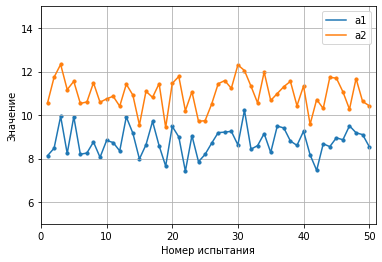

In [222]:
draw_borders(left, right)

In [223]:
left, right = get_borders_unknown_disp(means, std, 0.99)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,11.405255,8.210293,8.685020,8.106713,11.594321,11.086971,11.947125,5.845018,7.166800,9.379780,9.342730,7.193529,11.491931
1,10.424820,10.275813,11.724820,11.118038,9.968943,10.647355,4.838370,14.273007,5.802079,12.002719,10.107596,7.214609,13.000584
2,6.816515,12.068240,11.072003,15.080586,9.541022,11.112424,11.234603,11.755064,11.636218,11.035975,11.135265,9.015564,13.254967
3,4.826831,9.805822,7.275574,9.472849,10.697913,8.335735,9.315349,11.695708,11.879578,13.731331,9.703669,7.102033,12.305304
4,10.643320,8.426280,12.965203,10.328685,9.814303,11.902051,10.098885,9.517158,11.239027,12.448073,10.738299,9.294507,12.182091


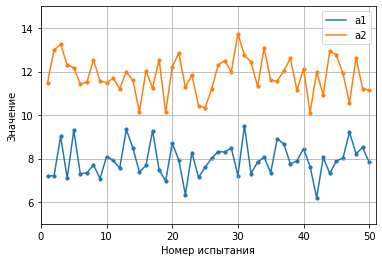

In [224]:
draw_borders(left, right)

## Интервалы для среднего и стандартного отклонения нормальной совокупности

In [225]:
norm_rv = sps.norm(10, 2)
sample = norm_rv.rvs(20)
mean = sample.mean()

ps = [0.8, 0.9, 0.95, 0.98, 0.99, 0.995, 0.998, 0.999]
pss = list(map(lambda x: (1+x)/2, ps))
left, right = [], []
for p in pss:
    fp = sps.norm(0,1).ppf(p)
    left.append(mean - fp*(2/np.sqrt(20)))
    right.append(mean + fp*(2/np.sqrt(20)))
    
df = pd.DataFrame(index=ps)
df['left'] = left
df['right'] = right
print('Интервалы для a:')
df

Интервалы для a:


,left,right
0.800,9.305753,10.452008
0.900,9.143279,10.614481
0.950,9.002358,10.755403
0.980,8.838506,10.919255
0.990,8.726934,11.030826
0.995,8.623537,11.134224
0.998,8.496886,11.260874
0.999,8.407312,11.350449


In [226]:
n = 10
left, right = [], []
std = statistics.stdev(sample)
for p in ps:
    tp = sps.t(df=9).ppf(p)
    chi2_rv = sps.chi2(df=19)
    t1 = chi2_rv.ppf((1+p)/2)
    t2 = chi2_rv.ppf((1-p)/2)
    left.append(std * np.sqrt((n-1) / t1))
    right.append(std * np.sqrt((n-1) / t2))
df = pd.DataFrame(index=ps)
df['left'] = left
df['right'] = right
print('Интервалы для sigma:')
df

Интервалы для sigma:


,left,right
0.800,0.913795,1.396309
0.900,0.868089,1.498426
0.950,0.831531,1.597010
0.980,0.792250,1.725129
0.990,0.767304,1.821828
0.995,0.745383,1.919163
0.998,0.719987,2.049702
0.999,0.702926,2.150390


In [230]:
norm_rv = sps.norm(10, 2)
sample = norm_rv.rvs(size=20)
stud_rv = sps.t(df=19)
chi2_rv = sps.chi2(df=19)
Pd = 0.95
print(stud_rv.ppf(Pd))
print(chi2_rv.ppf(1-Pd))
print('Верхняя граница для a: ', np.round(sample.mean() + stud_rv.ppf(Pd) * statistics.stdev(sample) / np.sqrt(20), 2))
print('Верхняя граница для sigma: ', np.round(statistics.stdev(sample) * np.sqrt((n-1) / chi2_rv.ppf(1-Pd)), 2))

1.729132811521367
10.117013063859051
Верхняя граница для a:  11.01
Верхняя граница для sigma:  2.16


## Задача

n=20, Pд=0.99, a=300

In [228]:
N = 10000
a = 300
n = 20

expon_rv = sps.expon(loc=a)
sample = expon_rv.rvs(n)
sample

array([304.63552978, 300.18284116, 300.37256418, 301.55189744,
       300.7132404 , 300.98814906, 300.13350418, 300.14589525,
       300.95285313, 300.78217178, 300.02508033, 300.73780546,
       300.05106951, 300.07441291, 303.42217337, 303.1837139 ,
       300.56032437, 301.11902742, 301.27395529, 300.91677807])

In [229]:
Pd = 0.99
mean = sample.mean()
chi2_rv = sps.chi2(df=2*n)
t1, t2 = chi2_rv.ppf((1-Pd)/2), chi2_rv.ppf((1+Pd)/2)
print('t1 =', np.round(t1, 2), 't2 =', np.round(t2, 2))
a1, a2 = 2*n*mean / t2, 2*n*mean / t1
print('Доверительный интервал для a ({:.2f}, {:.2f})'.format(a1, a2))

m1, m2 = N*(1 - np.exp(-50/a2)), N*(1 - np.exp(-50/a1))
print('Доверительный интервал для M ({:.2f}, {:.2f})'.format(m1, m2))

t1 = 20.71 t2 = 66.77
Доверительный интервал для a (180.39, 581.64)
Доверительный интервал для M (823.73, 2420.84)
